In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
!pip install graphviz

In [44]:
import pandas as pd
import csv 
real_X = np.empty((0,5))
real_y = np.array([]) 
f = open("./test/test_stomach.csv", 'r', encoding= "UTF-8")
reader = csv.reader(f)
for num, line in enumerate(reader) : 
    if num == 0 : continue
    real_X= np.append(real_X, [line[:5]], axis=0)
    real_y= np.append(real_y, line[5])
f.close()


In [51]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=40)
tree_clf.fit(real_X, real_y)

DecisionTreeClassifier(max_depth=5, random_state=40)

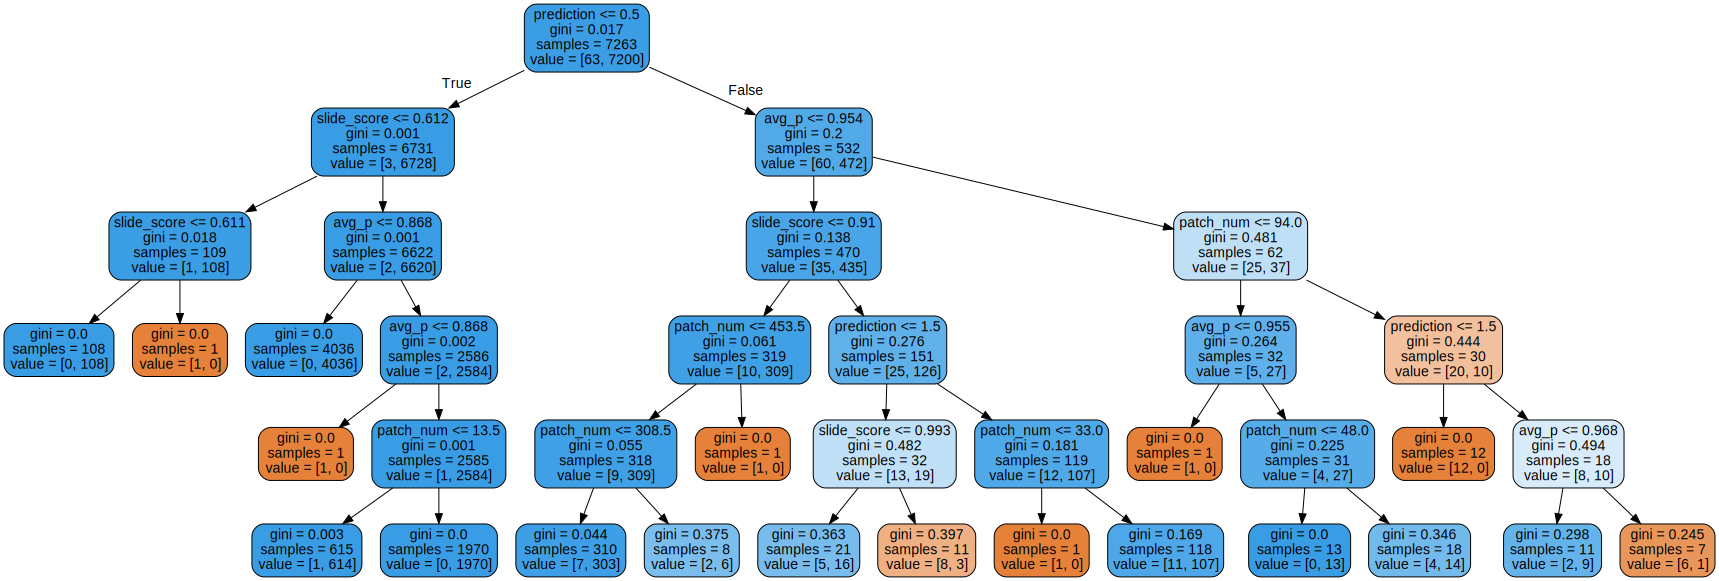

In [52]:
from graphviz import Source
from sklearn.tree import export_graphviz

x_class = np.array(['D', 'N'])
x_feature = np.array(['slide_score', 'patch_num', 'avg_p', 'var_p', 'prediction'])
export_graphviz(
        tree_clf,
        out_file="Classification.dot",
        feature_names=x_feature,
        rounded=True,
        filled=True
    )

Source.from_file("Classification.dot")

In [53]:
from sklearn.metrics import accuracy_score

y_pred_tr = tree_clf.predict(real_X)
print('Accuracy: %.4f' % accuracy_score(real_y, y_pred_tr))

Accuracy: 0.9950


In [67]:
X = np.array([ [float(x[1]), float(x[2])] for x in real_X if x[4] != 0 ])
axes = [np.max(X , axis=0), np.min(X, axis=0)]

In [80]:
axes

[array([1.36500000e+03, 9.99947906e-01]), array([1., 0.])]

In [79]:
# 위의 과정을 시각화하기 

from matplotlib.colors import ListedColormap

X = np.array([ [int(x[1]), float(x[2])] for x in real_X if x[4] != 0 ])
axes = [np.max(X , axis=0), np.min(X, axis=0)]

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[1][0], axes[0][0], 100) # 0~ 7.5 값 사이에 100개로 나누기 
    x2s = np.linspace(0, 1, 100)
    x1, x2 = np.meshgrid(x1s, x2s) #x1s 가 x 좌표로, x2s 가 y 좌표처럼 입력됨
    X_new = np.c_[x1.ravel(), x2.ravel()] 
    #ravel() : 1차원으로 평평하게 배열
    # np.c_ : 2개의 1차원 배열을 세로로 붙여서 2차원 배열 만들기 
    # => (x,y) 2차원 좌표 값으로 표현하기. 

    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']) # 해당 색깔로 익히기 
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap) # 등치선 표현하기 
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y=='N'], X[:, 1][y=='N'], "yo", label="GT-N")
        plt.plot(X[:, 0][y=='D'], X[:, 1][y=='D'], "bs", label="GT-D")
        plt.plot(X[:, 0][y=='M'], X[:, 1][y=='M'], "g^", label="GT-M")
        plt.axis(axes)
    plt.xlabel("patch_num", fontsize=14)
    plt.ylabel("patch_num", fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, real_X, real_y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

TypeError: 'float' object is not subscriptable

<Figure size 800x400 with 0 Axes>

In [81]:
np.linspace(np.float(1),int(10),100)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16308\1386026544.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.linspace(np.float(1),int(10),100)


array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27